# Racetrack Problem with Q-Learning and SARSA

Consider driving a race car around a turn like those shown in Figure.

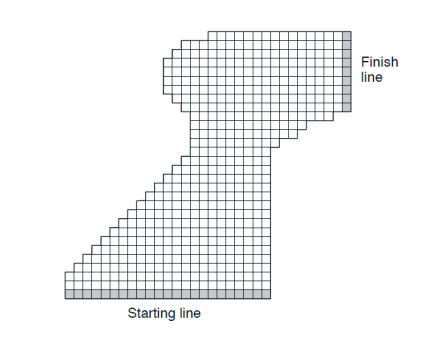

You want to go as fast as possible, but not so fast as to run off the track. In our simplified racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is also discrete, a number of grid cells moved horizontally and vertically per time step. The actions are increments to the velocity components. Each may be changed by +1, -1, or 0 in one step, for a total of nine actions. Both velocity components are restricted to be nonnegative and less than 5, and they cannot both be zero. Each episode begins in one of the randomly selected start states and ends when the car crosses the finish line. The rewards are -1 for each step that stays on the track, and -5 if the agent tries to drive off the track. When the car goes off track, it will start from an initial random starting position.

Solve this problem using Q-learning and SARSA. Set the discount rate to 1. You can end the episode at 200 if the car was unable to reach the finish line. Run the algorithms by tuning parameters as long as they provide reasonable results. Report the optimal policies and values for each state. You can simulate an optimal policy starting from starting line with velocity 0 and observe the track.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import car
import random
import pandas as pd

In [2]:
RACE_TRACK ="""
#################################
#################               F
##############                  F
#############                   F
############                    F
############                    F
############                    F
############                    F
#############                   F 
##############                  F      
###############                ##
###############             #####
###############            ######
###############          ########
###############         #########
##############          ######### 
#############           #########             
############            #########             
###########             #########              
##########              #########
#########               #########
########                #########
#######                 #########
######                  #########
#####                   #########
####                    #########
###                     #########
##                      #########
#                       #########
#                       #########
#SSSSSSSSSSSSSSSSSSSSSSS#########
"""

In [3]:
def ascii_to_array(ascii_track: str) -> np.ndarray:
    """Convert the ascii (string) map to a NumPy array."""
    lines = [line.strip() for line in ascii_track.split("\n") if len(line.strip()) > 0]
    max_length = max(len(line) for line in lines)
    padded_lines = [line.ljust(max_length, ' ') for line in lines]
    byte_lines = [list(bytes(line, encoding="utf-8")) for line in padded_lines]
    return np.array(byte_lines, dtype=np.uint8)

In [4]:
track_array = ascii_to_array(RACE_TRACK)
track_array

array([[35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 32, 32, 70],
       [35, 35, 35, ..., 32, 32, 70],
       ...,
       [35, 32, 32, ..., 35, 35, 35],
       [35, 32, 32, ..., 35, 35, 35],
       [35, 83, 83, ..., 35, 35, 35]], dtype=uint8)

According to above array,

**35** -> Wall

**32** -> Road

**83** -> Starting Points

**70** -> Finish Points

For simulating this problem, **'car'** class had been used. This class could be found in **'car.py'** file.

In [5]:
agent = car.car(track_array)

In [6]:
agent.ACTION_SPACE

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

**Q-LEARNING**

In [7]:
def max_dict(d):
    max_val = max(d.values())
    max_keys = [key for key, val in d.items() if val == max_val]
    return random.choice(max_keys), max_val

In [8]:
def epsilon_greedy(Q, s, eps=0.1):
    if random.random() < eps:
        return random.choice(agent.ACTION_SPACE)
    else:
        a_opt = max_dict(Q[s])[0]
    return a_opt


In [9]:
Q = {}
for s in agent.States:
    Q[s] = {}
    for a in agent.ACTION_SPACE:
        Q[s][a] = 0

In [10]:
Q

{(0, 0, 1, 1): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 1, 2): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 1, 3): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 1, 4): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 1, 5): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 2, 1): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 2, 2): {(-1, -1): 0,
  (-1, 0): 0,
  (-1, 1): 0,
  (0, -1): 0,
  (0, 0): 0,
  (0, 1): 0,
  (1, -1): 0,
  (1, 0): 0,
  (1, 1): 0},
 (0, 0, 2, 3): {(-1, -1): 0,
  (-1

In [11]:
len(Q)

25575

In [12]:
# Set the discount factor (gamma) and learning rate (alpha)
GAMMA = 1.0
ALPHA = 0.1

# Initialize dictionaries to keep track of state update counts and rewards per episode
update_counts = {}
reward_per_episode = []

# Iterate over a fixed number of episodes
for it in range(10000):
    # Print the current iteration number every 1000 iterations
    if it % 1000 == 0:
        print("it:", it)
        
    # Begin a new episode by resetting the environment to the initial state
    s = agent.initial_state()
    
    # Initialize the episode reward to zero
    episode_reward = 0
    
    # Flag to indicate whether the episode is finished
    done = False
    
    # Continue the episode until it is finished
    while not done:
        # Select an action using epsilon-greedy policy based on the current state and Q-values
        a = epsilon_greedy(Q, s, eps=0.1)
        
        # Perform the selected action and observe the next state and reward
        s2, r, done = agent.step(a)
        
        # Accumulate the reward for the current episode
        episode_reward += r
        
        # Calculate the maximum Q-value for the next state
        maxQ = max_dict(Q[s2])[1]
        
        # Update the Q-value of the current state-action pair using the Q-learning update rule
        Q[s][a] = Q[s][a] + ALPHA * (r + GAMMA * maxQ - Q[s][a])
        
        # Increment the count of updates for the current state
        update_counts[s] = update_counts.get(s, 0) + 1
        
        # Transition to the next state
        s = s2
        
        # Log the total reward for this episode
        reward_per_episode.append(episode_reward)

it: 0
it: 1000
it: 2000
it: 3000
it: 4000
it: 5000
it: 6000
it: 7000
it: 8000
it: 9000


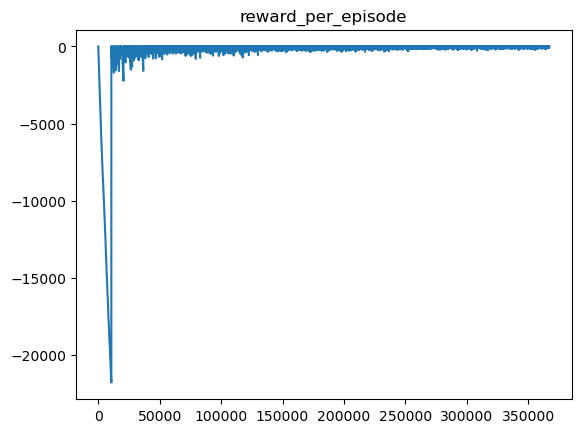

In [13]:
plt.plot(reward_per_episode)
plt.title("reward_per_episode")
plt.show()

In [14]:
data = []
for state, action_values in Q.items():
    for action, value in action_values.items():
        data.append(state + action + (value,))

df = pd.DataFrame(data, columns=['State_i', 'State_j', 'Velocity_x', 'Velocity_y', 'Action_i', 'Action_j', 'Q_Value'])


In [15]:
# Q_Values which are different than 0:
filtered_df = df[df['Q_Value'] != 0.0]

filtered_df

,State_i,State_j,Velocity_x,Velocity_y,Action_i,Action_j,Q_Value
11466,1,17,5,5,-1,-1,-1.283654
11467,1,17,5,5,-1,0,-0.534800
11468,1,17,5,5,-1,1,-0.577590
11469,1,17,5,5,0,-1,-0.530900
11470,1,17,5,5,0,0,-0.200000
...,...,...,...,...,...,...,...
228145,30,23,5,5,0,0,-7.464004
228146,30,23,5,5,0,1,-7.519817
228147,30,23,5,5,1,-1,-7.457845
228148,30,23,5,5,1,0,-7.583422


In [17]:
policy_Q = {}
V_Q = {}
for s in agent.actions.keys():
    a, max_q = max_dict(Q[s])
    policy_Q[s] = a
    V_Q[s] = max_q

In [18]:
policy_Q

{(1, 17, 1, 1): (-1, 0),
 (1, 17, 1, 2): (-1, 1),
 (1, 17, 1, 3): (-1, 0),
 (1, 17, 1, 4): (1, -1),
 (1, 17, 1, 5): (1, 0),
 (1, 17, 2, 1): (1, 0),
 (1, 17, 2, 2): (0, 1),
 (1, 17, 2, 3): (0, 0),
 (1, 17, 2, 4): (-1, -1),
 (1, 17, 2, 5): (-1, 1),
 (1, 17, 3, 1): (-1, 1),
 (1, 17, 3, 2): (0, 1),
 (1, 17, 3, 3): (0, 0),
 (1, 17, 3, 4): (0, -1),
 (1, 17, 3, 5): (0, 1),
 (1, 17, 4, 1): (-1, -1),
 (1, 17, 4, 2): (1, -1),
 (1, 17, 4, 3): (-1, 0),
 (1, 17, 4, 4): (-1, 1),
 (1, 17, 4, 5): (1, -1),
 (1, 17, 5, 1): (1, 1),
 (1, 17, 5, 2): (1, 0),
 (1, 17, 5, 3): (0, -1),
 (1, 17, 5, 4): (0, 1),
 (1, 17, 5, 5): (0, 1),
 (1, 18, 1, 1): (1, -1),
 (1, 18, 1, 2): (1, -1),
 (1, 18, 1, 3): (-1, 1),
 (1, 18, 1, 4): (0, 1),
 (1, 18, 1, 5): (0, 1),
 (1, 18, 2, 1): (-1, 0),
 (1, 18, 2, 2): (-1, -1),
 (1, 18, 2, 3): (1, 0),
 (1, 18, 2, 4): (0, -1),
 (1, 18, 2, 5): (0, 1),
 (1, 18, 3, 1): (1, 1),
 (1, 18, 3, 2): (1, 0),
 (1, 18, 3, 3): (-1, -1),
 (1, 18, 3, 4): (-1, 0),
 (1, 18, 3, 5): (-1, 1),
 (1, 18, 4, 1

In [19]:
V_Q

{(1, 17, 1, 1): 0,
 (1, 17, 1, 2): 0,
 (1, 17, 1, 3): 0,
 (1, 17, 1, 4): 0,
 (1, 17, 1, 5): 0,
 (1, 17, 2, 1): 0,
 (1, 17, 2, 2): 0,
 (1, 17, 2, 3): 0,
 (1, 17, 2, 4): 0,
 (1, 17, 2, 5): 0,
 (1, 17, 3, 1): 0,
 (1, 17, 3, 2): 0,
 (1, 17, 3, 3): 0,
 (1, 17, 3, 4): 0,
 (1, 17, 3, 5): 0,
 (1, 17, 4, 1): 0,
 (1, 17, 4, 2): 0,
 (1, 17, 4, 3): 0,
 (1, 17, 4, 4): 0,
 (1, 17, 4, 5): 0,
 (1, 17, 5, 1): 0,
 (1, 17, 5, 2): 0,
 (1, 17, 5, 3): 0,
 (1, 17, 5, 4): 0,
 (1, 17, 5, 5): -0.19,
 (1, 18, 1, 1): 0,
 (1, 18, 1, 2): 0,
 (1, 18, 1, 3): 0,
 (1, 18, 1, 4): 0,
 (1, 18, 1, 5): 0,
 (1, 18, 2, 1): 0,
 (1, 18, 2, 2): 0,
 (1, 18, 2, 3): 0,
 (1, 18, 2, 4): 0,
 (1, 18, 2, 5): 0,
 (1, 18, 3, 1): 0,
 (1, 18, 3, 2): 0,
 (1, 18, 3, 3): 0,
 (1, 18, 3, 4): 0,
 (1, 18, 3, 5): 0,
 (1, 18, 4, 1): 0,
 (1, 18, 4, 2): 0,
 (1, 18, 4, 3): 0,
 (1, 18, 4, 4): 0,
 (1, 18, 4, 5): 0,
 (1, 18, 5, 1): 0,
 (1, 18, 5, 2): 0,
 (1, 18, 5, 3): 0,
 (1, 18, 5, 4): 0,
 (1, 18, 5, 5): -4.946459372429805,
 (1, 19, 1, 1): 0,
 (1, 19, 1

**SARSA**

In [20]:
# Set the discount factor (gamma) and learning rate (alpha)
GAMMA = 1.0
ALPHA = 0.1

# Initialize dictionaries to keep track of state update counts and rewards per episode
update_counts = {}
reward_per_episode = []

# Iterate over a fixed number of episodes
for it in range(10000):
    # Print the current iteration number every 1000 iterations
    if it % 1000 == 0:
        print("it:", it)
        
    # Begin a new episode by resetting the environment to the initial state
    s = agent.initial_state()

    # Select an action using epsilon-greedy policy based on the current state and Q-values
    a = epsilon_greedy(Q, s, eps=0.1)

    # Initialize the episode reward to zero
    episode_reward = 0
    
    # Flag to indicate whether the episode is finished
    done = False
    
    # Continue the episode until it is finished
    while not done:
        # Perform the selected action and observe the next state and reward
        s2, r, done = agent.step(a)
        
        # Accumulate the reward for the current episode
        episode_reward += r
        
        # Select the next action using epsilon-greedy policy based on the next state and Q-values
        a2 = epsilon_greedy(Q, s2, eps=0.1)
        
        # Update the Q-value of the current state-action pair using the SARSA update rule
        Q[s][a] = Q[s][a] + ALPHA * (r + GAMMA * Q[s2][a2] - Q[s][a])

        # Increment the count of updates for the current state
        update_counts[s] = update_counts.get(s, 0) + 1
        
        # Transition to the next state and action
        s = s2
        a = a2
        
        # Log the total reward for this episode
        reward_per_episode.append(episode_reward)

it: 0
it: 1000
it: 2000
it: 3000
it: 4000
it: 5000
it: 6000
it: 7000
it: 8000
it: 9000


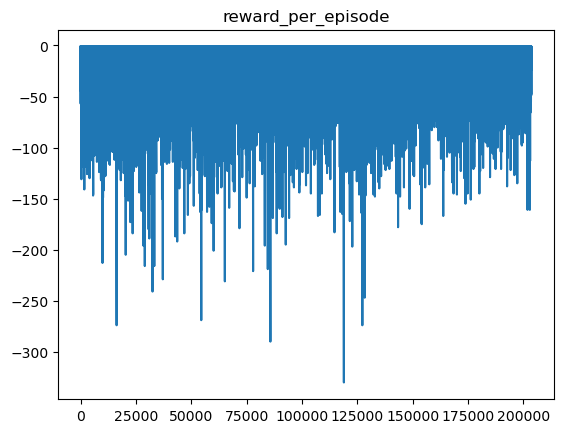

In [21]:
plt.plot(reward_per_episode)
plt.title("reward_per_episode")
plt.show()

In [22]:
data1 = []
for state, action_values in Q.items():
    for action, value in action_values.items():
        data1.append(state + action + (value,))

df1 = pd.DataFrame(data1, columns=['State_i', 'State_j', 'Velocity_x', 'Velocity_y', 'Action_i', 'Action_j', 'Q_Value'])

In [23]:
filtered_df1 = df1[df1['Q_Value'] != 0.0]

filtered_df1

,State_i,State_j,Velocity_x,Velocity_y,Action_i,Action_j,Q_Value
11466,1,17,5,5,-1,-1,-1.283654
11467,1,17,5,5,-1,0,-0.534800
11468,1,17,5,5,-1,1,-0.577590
11469,1,17,5,5,0,-1,-0.530900
11470,1,17,5,5,0,0,-0.585130
...,...,...,...,...,...,...,...
228145,30,23,5,5,0,0,-9.247681
228146,30,23,5,5,0,1,-9.406641
228147,30,23,5,5,1,-1,-9.176389
228148,30,23,5,5,1,0,-9.242373


In [24]:
policy_sarsa = {}
V_sarsa = {}
for s in agent.actions.keys():
    a, max_q = max_dict(Q[s])
    policy_sarsa[s] = a
    V_sarsa[s] = max_q

In [25]:
policy_sarsa

{(1, 17, 1, 1): (0, 0),
 (1, 17, 1, 2): (1, 0),
 (1, 17, 1, 3): (-1, 1),
 (1, 17, 1, 4): (-1, 1),
 (1, 17, 1, 5): (1, 0),
 (1, 17, 2, 1): (0, -1),
 (1, 17, 2, 2): (0, 0),
 (1, 17, 2, 3): (1, 1),
 (1, 17, 2, 4): (0, -1),
 (1, 17, 2, 5): (-1, -1),
 (1, 17, 3, 1): (-1, 0),
 (1, 17, 3, 2): (1, -1),
 (1, 17, 3, 3): (1, -1),
 (1, 17, 3, 4): (-1, 0),
 (1, 17, 3, 5): (0, 0),
 (1, 17, 4, 1): (1, -1),
 (1, 17, 4, 2): (1, -1),
 (1, 17, 4, 3): (-1, 1),
 (1, 17, 4, 4): (0, 1),
 (1, 17, 4, 5): (1, 0),
 (1, 17, 5, 1): (1, 1),
 (1, 17, 5, 2): (0, 1),
 (1, 17, 5, 3): (-1, 1),
 (1, 17, 5, 4): (0, 1),
 (1, 17, 5, 5): (1, 0),
 (1, 18, 1, 1): (1, 0),
 (1, 18, 1, 2): (1, 1),
 (1, 18, 1, 3): (-1, 0),
 (1, 18, 1, 4): (0, -1),
 (1, 18, 1, 5): (-1, 0),
 (1, 18, 2, 1): (0, 1),
 (1, 18, 2, 2): (-1, 1),
 (1, 18, 2, 3): (1, 0),
 (1, 18, 2, 4): (-1, -1),
 (1, 18, 2, 5): (1, -1),
 (1, 18, 3, 1): (1, -1),
 (1, 18, 3, 2): (1, -1),
 (1, 18, 3, 3): (0, 1),
 (1, 18, 3, 4): (1, 1),
 (1, 18, 3, 5): (0, 0),
 (1, 18, 4, 1): (

In [26]:
V_sarsa

{(1, 17, 1, 1): 0,
 (1, 17, 1, 2): 0,
 (1, 17, 1, 3): 0,
 (1, 17, 1, 4): 0,
 (1, 17, 1, 5): 0,
 (1, 17, 2, 1): 0,
 (1, 17, 2, 2): 0,
 (1, 17, 2, 3): 0,
 (1, 17, 2, 4): 0,
 (1, 17, 2, 5): 0,
 (1, 17, 3, 1): 0,
 (1, 17, 3, 2): 0,
 (1, 17, 3, 3): 0,
 (1, 17, 3, 4): 0,
 (1, 17, 3, 5): 0,
 (1, 17, 4, 1): 0,
 (1, 17, 4, 2): 0,
 (1, 17, 4, 3): 0,
 (1, 17, 4, 4): 0,
 (1, 17, 4, 5): 0,
 (1, 17, 5, 1): 0,
 (1, 17, 5, 2): 0,
 (1, 17, 5, 3): 0,
 (1, 17, 5, 4): 0,
 (1, 17, 5, 5): -0.46972164345216283,
 (1, 18, 1, 1): 0,
 (1, 18, 1, 2): 0,
 (1, 18, 1, 3): 0,
 (1, 18, 1, 4): 0,
 (1, 18, 1, 5): 0,
 (1, 18, 2, 1): 0,
 (1, 18, 2, 2): 0,
 (1, 18, 2, 3): 0,
 (1, 18, 2, 4): 0,
 (1, 18, 2, 5): 0,
 (1, 18, 3, 1): 0,
 (1, 18, 3, 2): 0,
 (1, 18, 3, 3): 0,
 (1, 18, 3, 4): 0,
 (1, 18, 3, 5): 0,
 (1, 18, 4, 1): 0,
 (1, 18, 4, 2): 0,
 (1, 18, 4, 3): 0,
 (1, 18, 4, 4): 0,
 (1, 18, 4, 5): 0,
 (1, 18, 5, 1): 0,
 (1, 18, 5, 2): 0,
 (1, 18, 5, 3): 0,
 (1, 18, 5, 4): 0,
 (1, 18, 5, 5): -6.5519749622367875,
 (1, 19, 1, 1